In [47]:
import numpy as np

def calculate_correlation_coefficient(x1, x2, y):
    # Convert the input lists to numpy arrays
    x1 = np.array(x1)
    x2 = np.array(x2)
    y = np.array(y)
    
    # Create a matrix X with the two independent variables
    X = np.column_stack((x1, x2))
    
    # Add a column of ones to X to account for the intercept
    X = np.column_stack((np.ones(len(x1)), X))
    
    # Calculate the coefficients using the formula (X'X)^-1 X'Y
    beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    
    # Calculate the residuals
    y_hat = X.dot(beta)
    residuals = y - y_hat
    
    # Calculate the total sum of squares
    TSS = np.sum((y - np.mean(y)) ** 2)
    
    # Calculate the residual sum of squares
    RSS = np.sum(residuals ** 2)
    
    # Calculate the R-squared value
    R_squared = 1 - (RSS / TSS)
    
    # Calculate the standard error of estimate
    SE = np.sqrt(RSS / (len(x1) - 3))
    
    # Calculate the correlation coefficient
    r = np.sqrt(R_squared)
    
    return r

# Example data
x1 = [5,4,3,4,4,7,7,5,5,5,5,5,6,4,5,6,6,5,4,5,4,5,5,5,4,5,6,7,5,7,6,4,5,6,6,4,5,5,5,6,4,5,6,6,4,7,6,5,6,6]
x2 = [5,4,5,5,5,5,7,5,5,4,5,5,6,5,5,6,5,5,4,5,4,4,5,6,4,4,5,6,6,7,7,4,5,6,6,4,5,4,5,7,4,5,7,6,4,7,5,4,6,6]
y =  [5,4,5,4,5,6,6,5,5,4,5,5,6,5,6,6,5,6,4,5,4,4,5,5,6,5,5,6,6,7,7,5,5,6,6,4,6,4,5,4,5,5,7,7,4,7,5,4,7,6]

# Call the function to calculate the correlation coefficient
r = calculate_correlation_coefficient(x1, x2, y)

# Print the result
print("The correlation coefficient is:", r)
print(len(x1))

The correlation coefficient is: 0.7402431499874633
50


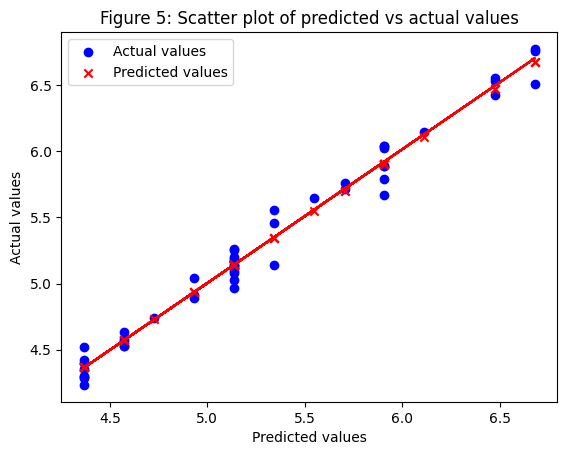

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# generate sample data for X1 and X2
x1 = np.array(x1)
x2 = np.array(x2)
y_pred = 0.2044*x1 + 0.5662*x2 + 1.2842
y_actual = y_pred + np.random.randn(50)*0.1
# calculate corresponding values for ŷ
y = 0.2044*x1 + 0.5662*x2 + 1.2842

# Create scatter plot of predicted vs actual values
plt.scatter(y_pred, y_actual, c='blue', marker='o', label='Actual values')
plt.scatter(y_pred, y, c='red', marker='x', label='Predicted values')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Figure 5: Scatter plot of predicted vs actual values')
plt.legend()

# Add best fit line
p = np.polyfit(y_pred, y_actual, 1)
plt.plot(y_pred, np.polyval(p, y_pred), 'r')
plt.show()

# show plot

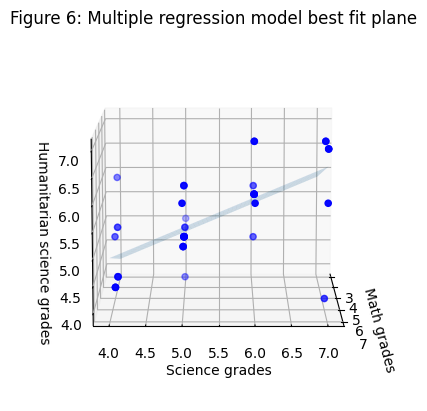

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# generate sample data for X1, X2, and Y
x1 = np.array([5,4,3,4,4,7,7,5,5,5,5,5,6,4,5,6,6,5,4,5,4,5,5,5,4,5,6,7,5,7,6,4,5,6,6,4,5,5,5,6,4,5,6,6,4,7,6,5,6,6])
x2 = np.array([5,4,5,5,5,5,7,5,5,4,5,5,6,5,5,6,5,5,4,5,4,4,5,6,4,4,5,6,6,7,7,4,5,6,6,4,5,4,5,7,4,5,7,6,4,7,5,4,6,6])
y =  np.array([5,4,5,4,5,6,6,5,5,4,5,5,6,5,6,6,5,6,4,5,4,4,5,5,6,5,5,6,6,7,7,5,5,6,6,4,6,4,5,4,5,5,7,7,4,7,5,4,7,6])

# fit a multiple regression model
X = np.column_stack((x1, x2))
X = np.column_stack((np.ones(len(X)), X))
coeffs = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# initialize figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# function to update view angle for animation
def update_view_angle(i, ax):
    ax.view_init(elev=10., azim=i)
    return ax

# create scatter plot
ax.scatter(x1, x2, y, c='blue', marker='o')

# add best fit line
x1_min, x1_max = np.min(x1), np.max(x1)
x2_min, x2_max = np.min(x2), np.max(x2)
x1_mesh, x2_mesh = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
y_mesh = coeffs[0] + coeffs[1]*x1_mesh + coeffs[2]*x2_mesh
ax.plot_surface(x1_mesh, x2_mesh, y_mesh, alpha=0.2)

# add labels and title
ax.set_xlabel('Math grades')
ax.set_ylabel('Science grades')
ax.set_zlabel('Humanitarian science grades')
ax.set_title('Figure 6: Multiple regression model best fit plane')

# create animation
ani = FuncAnimation(fig, update_view_angle, frames=np.arange(0, 360, 10), fargs=(ax,), interval=500)

# save animation as .gif
ani.save('scatter_plot.gif', writer='imagemagick')